<a href="https://colab.research.google.com/github/alvaphelan/Python-HowTos/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

Matplotlib is an extremely useful tool when it comes to plotting all types of data, and you will be using it frequently. Once again you must import this package before you start.


In [1]:
import matplotlib.pyplot as plt
#importing numpy too 
import numpy as np

In this section, random functions will be used, but the same applies to all data that can be imported. 

*find section on how to import data here ([importing data](https://github.com/UCD-Physics/Python-HowTos/blob/main/Importing_Data.ipynb))*

In [2]:
#creating functions to plot

x = np.linspace(-50, 50, 40)
y = 6*x -4 

There are two ways to plot raw data, plt.scatter and plt.plot. Scatter is used if you are just looking to plot points, while plot will plot the shape of the data.

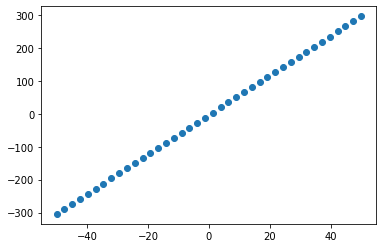

In [3]:
plt.scatter(x,y)

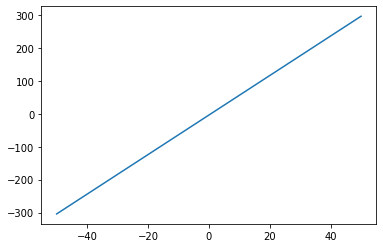

In [4]:
plt.plot(x,y)

Both can be useful for different things, but scatter is mostly used for experiments when plotting data obtained in the lab and then plot can be used to plot the theoretical values on top of it to see if they match.

It is possible to change the way your function/data looks on the graph by using parameters in the plotting functions.

- marker = '.' will allow you to change the size/shape of the data points (. for small dots, o for cirlces, x to make x's etc.) 
- color = 'red' will allow you to change the points to whatever colour you want. (*must be spelled the American way*)
- label = 'data' will allow you to name the data and will be seen in the legend, this is useful when you have more than one line with different data on the same graph.


The graphs can be manipulated in many ways in order to get them how you want them to look.

- plt.grid(True) will add in a grid
- plt.title(' ') will allow you to put in a title for your graph
- plt.xlabel(' ') and plt.ylabel(' ') will allow you to put labels on the x and y axes
- plt.legend(loc = 'upper left') will allow you to place a legend wherever you want on the graph

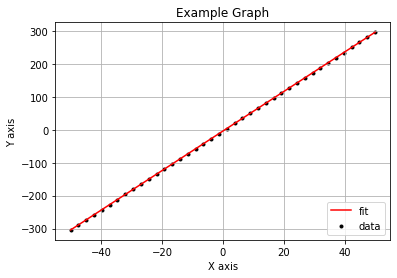

In [5]:
#example
plt.scatter(x, y, marker = '.', color = 'black', label = 'data')
plt.plot(x, y, color = 'red', label = 'fit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Example Graph')
plt.grid(True)
plt.legend(loc = 'lower right')

### Fitting curves to data

Another extremely important aspect of graphing data is using curve_fit in order to fit lines and curves to data. This is useful when comparing theoretical and experimental values.

#### How it works

First, you must import the curve fit function from scipy

In [6]:
from scipy.optimize import curve_fit

Then, you must define the function you want to fit to the data. In this example, we will go through a simple straight linear line but this can be done with quadratics, exponentials etc. 

In [7]:
def func(x, m, c):
    y = m*x + c
    return y

Taking m as the slope and c as the intercept, this is the generic form for a straight line. 

Then, it is time to use curve_fit. This will provide you with two matrices, popt and pcov.

In [9]:
popt, pcov = curve_fit(func, x, y)

Popt is an array with the optimum parameters for the function (m and c in this case), and they are in the same order as defined in the function. They can be accessed by the following (*as explained in section ([how-to-use-numpy](https://github.com/alvaphelan/Python-HowTos/blob/main/Numpy.ipynb))*)

In [10]:
m = popt[0]
c = popt[1]
print(f"The optimum slope for this function is {m} and intercept is {c}")

The optimum slope for this function is 6.0 and intercept is -3.999999999999995


Pcov returns the covariance matrix (explained in more detail here ([errors](https://veritas.ucd.ie/~apl/labs_master/docs/2020/DA/Error_Propagation.pdf))), but put simply, the errors on the parameters are the square root of the diagonal elements of the matrix, in this case

In [11]:
m_error = np.sqrt(pcov[0, 0])
c_error = np.sqrt(pcov[1, 1])

It is then possible to create a yfit to this function


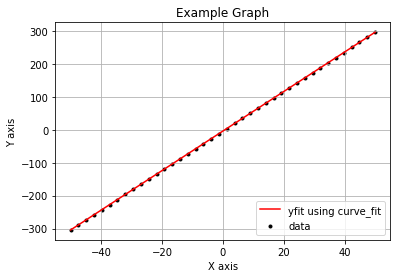

In [12]:
yfit = popt[0]*x + popt[1]

#and can then graph the data and yfit
plt.scatter(x, y, marker = '.', color = 'black', label = 'data')
plt.plot(x, yfit, color = 'red', label = 'yfit using curve_fit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Example Graph')
plt.grid(True)
plt.legend(loc = 'lower right')